In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

# Simple Linear Regression

## Generate Data

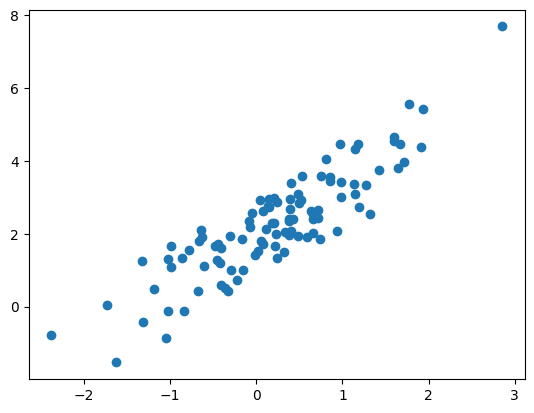

In [2]:
X = np.random.randn(100).reshape(-1, 1)
w = np.random.uniform(low=1, high=2, size=(100, 1))
b = np.random.uniform(low=1, high=3, size=(100, 1))
y = w * X + b
plt.scatter(X, y)

In [3]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


### Our goal is to find the line of best fit for the above data. This will be done using Gradient Descent and Backpropagation to find the most optimal weight and bias value

## Training Loop

In [4]:
def linear_regression(X, y, numb_epochs=1000, lr=1e-3):
    # initalize weight and bias
    w = np.random.randn(1, 1)
    b = np.zeros((1, 1))
    
    for epoch in range(numb_epochs):
        # Forward
        z = np.dot(X, w) + b
        
        # Calculate Mean Squared Error Loss
        loss = np.mean((z - y) ** 2)
        if (epoch+1) % 100 == 0:
            print(f"Epoch: {epoch+1}, loss: {loss:.5f}")
        
        # Calculate Gradients (Backpropagation)
        dL_dz = 2 * (z - y)
        dz_dw = X.T
        dL_dw = np.dot(dz_dw, dL_dz) / X.shape[0]
        
        dz_db = 1
        dL_db = np.sum(dz_db * dL_dz, axis=0) / X.shape[0]
        
        # Make Step (Gradient Descent)
        w = w - lr * dL_dw
        b = b - lr * dL_db
    return w, b

In [5]:
w, b = linear_regression(X, y, numb_epochs=2500, lr=1e-3)

Epoch: 100, loss: 6.46707
Epoch: 200, loss: 4.24870
Epoch: 300, loss: 2.85107
Epoch: 400, loss: 1.96986
Epoch: 500, loss: 1.41377
Epoch: 600, loss: 1.06246
Epoch: 700, loss: 0.84024
Epoch: 800, loss: 0.69945
Epoch: 900, loss: 0.61010
Epoch: 1000, loss: 0.55327
Epoch: 1100, loss: 0.51702
Epoch: 1200, loss: 0.49385
Epoch: 1300, loss: 0.47897
Epoch: 1400, loss: 0.46938
Epoch: 1500, loss: 0.46318
Epoch: 1600, loss: 0.45914
Epoch: 1700, loss: 0.45649
Epoch: 1800, loss: 0.45475
Epoch: 1900, loss: 0.45359
Epoch: 2000, loss: 0.45282
Epoch: 2100, loss: 0.45230
Epoch: 2200, loss: 0.45194
Epoch: 2300, loss: 0.45170
Epoch: 2400, loss: 0.45153
Epoch: 2500, loss: 0.45141


In [6]:
preds = np.dot(X, w) + b

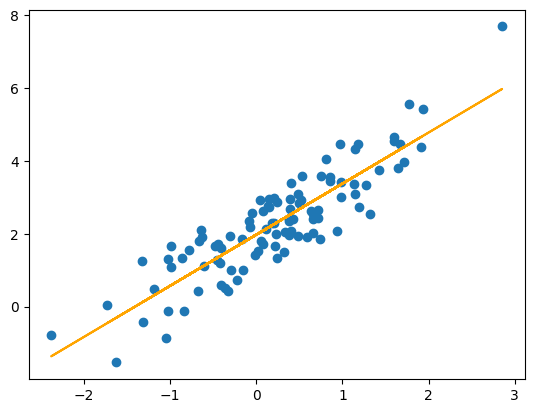

In [7]:
plt.scatter(X, y)
plt.plot(X, preds, color="orange")

### As we can see, the line is drawn by connecting the model's predictions given the inputs using the most optimal weight and bias value. The line can be interpreted as the line of best fit for this data.

# 2 Layer Neural Network for Binary Classification (1 Hidden Layer)

## Generate Data

In [8]:
X, y = datasets.make_moons(n_samples=10000, shuffle=True, noise=0.17)
# X, y = datasets.make_circles(n_samples=10000, shuffle=True, noise=0.07)
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [9]:
points = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=y.flatten()))
points.head()

,x1,x2,label
0,-0.716594,0.612208,0
1,0.315933,-0.049545,1
2,0.959541,-0.504388,1
3,1.747776,0.215087,1
4,0.693827,0.735205,0


## Plotting the Data

### As you can see there are 2 classes color coded with green and blue. There is some overlap of the points and so we expect the model to classify most points correctly but there will be some discrepencies because of the noise in the data

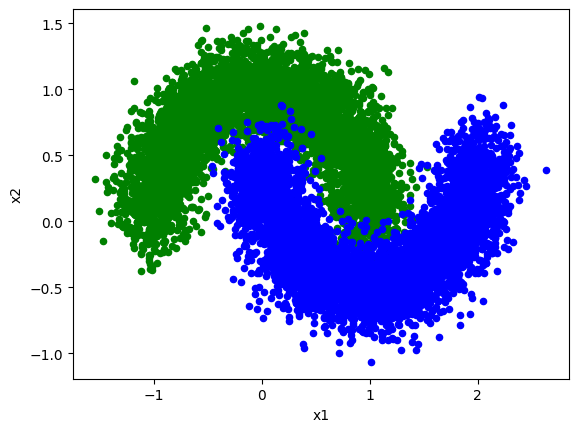

In [10]:
fig, axis = plt.subplots()
colors = {0: "green", 1: "blue"}

for key, group in points.groupby("label"):
    group.plot(ax=axis, kind="scatter", x="x1", y="x2", color=colors[key])
    
plt.show()

### There are two ways to approach this binary classification problem:
1) We could either have 1 output neuron and just use a final sigmoid activation layer and interpret it as the probability that the prediction belongs to one of the classes. Since it is binary classification, the probablity of the prediction being the other class would be 1 - P, where P is the probability of one of the classes. This method would use a Binary Cross Entropy Loss function.

2) Another way is to have 2 output neurons (one for each class), and use a final softmax activation layer and interpret this as the probability that the prediction belongs to the specific classes. This method would use a Cross Entropy Loss function.

I decided to use method 2 since the formula for Cross Entropy Loss is much simpler and in backpropagation, calculating partial derivatives is also easier when paired with the Softmax Activation function.

In [11]:
n_classes = len(np.unique(y)) # number of classes
ohe_y = np.zeros((y.size, n_classes))
ohe_y[np.arange(y.size), y] = 1
y = ohe_y

## Activation functions and their derivatives that will be used during forward and backpropagation

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [14]:
def relu(x):
    return np.maximum(x, 0)

In [15]:
def relu_derivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

In [16]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

## Training Loop

In [17]:
def train_2layer_nnet(X, y, numb_epochs=1000, lr=1e-3):
    # randomly initialize weights and biases
    numb_input_nodes, numb_h_nodes, numb_output_nodes = 2, 6, 2
    a0 = X # (n, 2)
    w1 = np.random.randn(numb_input_nodes, numb_h_nodes)# (2, 6)
    b1 = np.zeros((1, numb_h_nodes)) # (1, 6) broadcasting will take care of first dimension
    w2 = np.random.randn(numb_h_nodes, numb_output_nodes) # (6, 2)
    b2 = np.zeros((1, numb_output_nodes)) # (1, 2) broadcasting will take care of first dimension
    
    for epoch in range(numb_epochs):
        # Forward
        
        # First Layer Forward
        z1 = np.dot(a0, w1) + b1 # (n, 6)
        a1 = relu(z1) # (n, 6)

        # Second Layer Forward
        z2 = np.dot(a1, w2) + b2 # (n, 2)
        a2 = softmax(z2) # (n, 2)
                
        # Calculate Cross Entropy Loss
        loss = np.mean(np.sum(-1 * y * np.log(a2 + 1e-7), axis=1))
        if (epoch+1) % 1000 == 0:
            print(f"Epoch: {epoch+1}, loss: {loss:.5f}")
                    
        # Calculate Gradients (Backpropagation)
        
        # Second Layer
        dL_dz2 = a2 - y # Combined partial derivative for both Cross Entropy and Softmax
        
        dz2_dw2 = a1.T # (6, n)
        dz2_db2 = 1
        dL_dw2 = np.dot(dz2_dw2, dL_dz2) / a1.shape[0] # (6, 2)
        dL_db2 = np.sum(dz2_db2 * dL_dz2, axis=0) / a1.shape[0] # (1, 2)
        
        dz2_da1 = w2.T # (2, 6)
        
        # First Layer
        dL_da1 = np.dot(dL_dz2, dz2_da1) # (n, 6)
        da1_dz1 = relu_derivative(z1) # (n, 6)
        dL_dz1 = dL_da1 * da1_dz1 # (n, 6)
        
        dz1_dw1 = a0.T # (2, n)
        dz1_db1 = 1
        dL_dw1 = np.dot(dz1_dw1, dL_dz1) / a0.shape[0] # (2, 6)
        dL_db1 = np.sum(dz1_db1 * dL_dz1, axis=0) / a0.shape[0] # (1, 6)
        
        # Make Step with Gradients (Gradient Descent)
        
        # Second Layer
        w2 = w2 - lr * dL_dw2
        b2 = b2 - lr * dL_db2
                
        # First Layer
        w1 = w1 - lr * dL_dw1
        b1 = b1 - lr * dL_db1
        
    return w1, b1, w2, b2

In [18]:
w1, b1, w2, b2 = train_2layer_nnet(X, y, 5000, 1e-1)

Epoch: 1000, loss: 0.11999
Epoch: 2000, loss: 0.06934
Epoch: 3000, loss: 0.05793
Epoch: 4000, loss: 0.05349
Epoch: 5000, loss: 0.05133


Sometimes, depending on the random initialization, the model may not be able to train and get stuck, so re-running the training loop will start over with a new model that may be better randomly initialized. Loss should be around 0.05

## Evaluating the accuracy of the model

In [19]:
a0 = X # (n, 2)

# First Layer Forward
z1 = np.dot(a0, w1) + b1 # (n, 6)
a1 = relu(z1) # (n, 6)

# Second Layer Forward
z2 = np.dot(a1, w2) + b2 # (n, 2)
a2 = softmax(z2) # (n, 2)

preds = a2

In [20]:
total = y.shape[0]
correct = (np.argmax(y, axis=1) == np.argmax(preds, axis=1)).sum()
print(f"The model got {correct} out of {total} correct: {100 * (correct / total):.3f}%")

The model got 9824 out of 10000 correct: 98.240%


### Returns a DataFrame with the value 2 if the prediction and the labels differ for any input

In [21]:
def find_differences(preds, y):
    diff = np.copy(preds)
    diff[preds != y] = 2
    return diff

In [22]:
diff = find_differences(np.argmax(preds, axis=1), np.argmax(y, axis=1))
diff_df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=diff.flatten()))

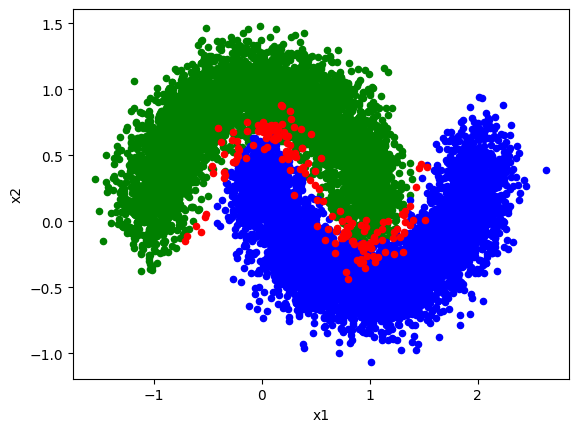

In [23]:
fig, axis = plt.subplots()
colors = {0: "green", 1: "blue", 2: "red"}
for key, group in diff_df.groupby("label"):
    group.plot(ax=axis, kind="scatter", x="x1", y="x2", color=colors[key])
    
plt.show()

### As we can see, the vast majority of points were classified correctly into their respective classes, but the points that were overlapped and on the edges were misclassified (in red). This is expected since there is some overlap in the data and it is difficult to make a clear judgement on what class some points belong to.

# N Layer Neural Network for Classification/Regression

### The Custom N Layer Neural Network will be built using object instances of specific classes modeled after the Pytorch nn library (such as Linear, Sequential, etc.) 

In [24]:
class Linear:
    def __init__(self, in_features, out_features, bias=True):
        self.weights = np.random.randn(in_features, out_features)
        self.biases = np.zeros((1, out_features)) # broadcasting will take care of first dimension
        self.inputs = 0
        self.dw = 0
        self.db = 0
        self.v_dw = 0
        self.v_db = 0
        
    def forward(self, x):
        self.inputs = x
        z = np.dot(x, self.weights) + self.biases
        return z
    
    def backward(self, dz):
        dz_dw = self.inputs.T
        dz_db = 1
        
        # Accumulate Gradients
        self.dw += np.dot(dz_dw, dz) / self.inputs.shape[0]
        self.db += np.sum(dz_db * dz, axis=0) / self.inputs.shape[0]
        
        # Compute da to be passed back to the previous layer
        dz_da = self.weights.T
        da = np.dot(dz, dz_da)
        return da
    
    def step(self, lr=1e-3, momentum=0):
        # Check if Momentum should be used
        if momentum <= 0:
            # Calculate Step without Momentum
            self.v_dw = self.dw
            self.v_db = self.db
        else:
            # Calculate Step with Momentum 
            self.v_dw = momentum * self.v_dw + (1 - momentum) * self.dw
            self.v_db = momentum * self.v_db + (1 - momentum) * self.db
        
        # Make Update
        self.weights -= lr * self.v_dw
        self.biases -= lr * self.v_db
    
    def zero_grad(self):
        self.dw = 0
        self.db = 0
    
    def __call__(self, x):
        return self.forward(x)

In [25]:
class Sigmoid:
    def __init__(self):
        self.inputs = 0
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, x):
        self.inputs = x
        return self.sigmoid(x)
    
    def backward(self, da):
        da_dz = self.sigmoid(self.inputs) * (1 - self.sigmoid(self.inputs))
        dz = da * da_dz
        return dz
    
    def step(self, lr=1e-3, momentum=0.9):
        pass
    
    def zero_grad(self):
        pass
    
    def __call__(self, x):
        return self.forward(x)

In [26]:
class Softmax:
    def __init__(self):
        pass
    
    def softmax(self, x):
        exp = np.exp(x - np.max(x, axis=1).reshape(-1, 1)) # numerical stability
        return exp / np.sum(exp, axis=1).reshape(-1, 1)
    
    def forward(self, x):
        return self.softmax(x)
    
    def __call__(self, x):
        return self.forward(x)

In [27]:
class ReLU:
    def __init__(self):
        self.inputs = 0
    
    def forward(self, x):
        self.inputs = x
        return np.maximum(x, 0)
    
    def backward(self, da):
        da_dz = np.ones(self.inputs.shape)
        da_dz[self.inputs <= 0] = 0
    
        dz = da * da_dz
        return dz
    
    def step(self, lr=1e-3, momentum=0.9):
        pass
    
    def zero_grad(self):
        pass
    
    def __call__(self, x):
        return self.forward(x)

In [28]:
class Sequential:
    def __init__(self, layers):
        self.layers = layers
        
    def forward(self, x):
        curr_input = x
        for layer in self.layers: # forward propagation on each layer from first to last layer
            out = layer.forward(curr_input)
            curr_input = out
            
        return out
    
    def backward(self, da):
        next_grad = da
        for layer in reversed(self.layers): # backward propagation on each layer from last to first layer
            next_grad = layer.backward(next_grad)
            
    def step(self, lr=1e-3, momentum=0.9):
        for layer in reversed(self.layers): # make a step using the calculated gradients from backpropagation
            layer.step(lr, momentum)
    
    def zero_grad(self):
        for layer in self.layers: # zero out the gradients in each layer
            layer.zero_grad()
            
    def __call__(self, x):
        return self.forward(x)

In [29]:
class MeanSquaredErrorLoss:
    def __init__(self, model):
        self.y_hat = 0
        self.y = 0
        self.model = model
        self.loss = 0
        
    def forward(self, y_hat, y):
        self.y_hat = y_hat
        self.y = y
        self.loss = np.mean((y_hat - y) ** 2)
        return self
    
    def backward(self):
        da = 2 * (self.y_hat - self.y)
        self.model.backward(da)
    
    def step(self):
        pass
    
    def zero_grad(self):
        pass
    
    def item(self):
        return self.loss
    
    def __call__(self, y_hat, y):
        return self.forward(y_hat, y)
    
    def __str__(self):
        return str(self.loss)

In [30]:
class CrossEntropyLoss:
    def __init__(self, model):
        self.y_hat = 0
        self.y = 0
        self.model = model
        self.loss = 0
        
    def softmax(self, x):
        exp = np.exp(x - np.max(x, axis=1).reshape(-1, 1)) # numerical stability
        return exp / np.sum(exp, axis=1).reshape(-1, 1)
        
    def forward(self, x, y):
        self.y_hat = self.softmax(x) # do a softmax to get predictions
        self.y = y
        self.loss = np.mean(np.sum(-1 * y * np.log(self.y_hat + 1e-7), axis=1))
        return self
    
    def backward(self):
        dz = self.y_hat - self.y # Combined partial derivative for both Cross Entropy and Softmax
        self.model.backward(dz)
    
    def step(self):
        pass
    
    def zero_grad(self):
        pass
    
    def item(self):
        return self.loss
    
    def __call__(self, y_hat, y):
        return self.forward(y_hat, y)
    
    def __str__(self):
        return str(self.loss)

In [31]:
class Optimizer:
    def __init__(self, model, lr=1e-3, momentum=0.9):
        self.model = model
        self.lr = lr
        self.momentum = momentum
        
    def zero_grad(self):
        self.model.zero_grad()
        
    def step(self):
        self.model.step(self.lr, self.momentum)

## Generate Data

In [32]:
X, y = datasets.make_classification(n_samples=10000, n_informative=3, n_classes=3, shuffle=True)

In [33]:
n_classes = len(np.unique(y))
ohe_y = np.zeros((y.size, n_classes))
ohe_y[np.arange(y.size), y] = 1
y = ohe_y

In [34]:
print(X.shape)
print(y.shape)

(10000, 20)
(10000, 3)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8500, 20)
(8500, 3)
(1500, 20)
(1500, 3)


## Training Loop

In [37]:
def train_nlayer_nnet(X, y, model, numb_epochs=1000, lr=1e-3, momentum=0.9):
    
    loss_fn = CrossEntropyLoss(model)
    optimizer = Optimizer(model, lr=lr, momentum=momentum)
    
    for epoch in range(numb_epochs+1):
        # Zero Out Gradients
        optimizer.zero_grad()
        
        # Forward
        preds = model(X)
        
        # Calculate Loss
        loss = loss_fn(preds, y)
        if (epoch+1) % 200 == 0:
            print(f"Epoch: {epoch+1}, loss: {loss.item():.5f}")
        
        # Calculate Gradients (Backpropagation)
        loss.backward()
        
        # Make Step with Gradients (Gradient Descent)
        optimizer.step()
        
    return model

## Create Model

In [38]:
model = Sequential([
    Linear(20, 10),
    ReLU(),
    Linear(10, 5),
    ReLU(),
    Linear(5, 3)
])

In [39]:
model = train_nlayer_nnet(X_train, y_train, model, numb_epochs=5000, lr=5e-1, momentum=0.9)

Epoch: 200, loss: 0.81456
Epoch: 400, loss: 0.70751
Epoch: 600, loss: 0.57898
Epoch: 800, loss: 0.50583
Epoch: 1000, loss: 0.43987
Epoch: 1200, loss: 0.37437
Epoch: 1400, loss: 0.35458
Epoch: 1600, loss: 0.33990
Epoch: 1800, loss: 0.32824
Epoch: 2000, loss: 0.31989
Epoch: 2200, loss: 0.31456
Epoch: 2400, loss: 0.31152
Epoch: 2600, loss: 0.30820
Epoch: 2800, loss: 0.30588
Epoch: 3000, loss: 0.30342
Epoch: 3200, loss: 0.30123
Epoch: 3400, loss: 0.29795
Epoch: 3600, loss: 0.29396
Epoch: 3800, loss: 0.28961
Epoch: 4000, loss: 0.28636
Epoch: 4200, loss: 0.28532
Epoch: 4400, loss: 0.28461
Epoch: 4600, loss: 0.28398
Epoch: 4800, loss: 0.28351
Epoch: 5000, loss: 0.28314


Sometimes, depending on the random initialization, the model may not be able to train and get stuck, so creating a new model and re-running the training loop will start over with a new model that may be better randomly initialized. Loss should be less than 0.5

## Evaluating the accuracy of the model

In [40]:
softmax = Softmax()
preds = softmax(model(X_test))
preds_classes = preds.round() # get classes of the predictions

In [41]:
total = y_test.shape[0]
correct = (np.argmax(y_test, axis=1) == np.argmax(preds_classes, axis=1)).sum()
print(f"The model got {correct} out of {total} correct: {100 * (correct / total):.3f}% in the testing set")

The model got 1335 out of 1500 correct: 89.000% in the testing set


### Using the custom neural network library, we built a model that is able to get around 85-90% accuracy on the testing data that it has not seen before, meaning that it has learned patterns in the data properly. This library will work on classification and regression data to build feed forward neural networks.